# Investigating Loan Factors affecting Loan Status

## Overview
In this investigation, I try to find How loan characteristics affect loan status of a borrower. I focused on 12 variables from the original dataset prosperLoanData.csv that contains total of 81 variables representing attributes of loan and borrower data.
The variables I used are: ['Term','LoanStatus','BorrowerAPR','BorrowerRate','EmploymentStatus','IncomeRange','IsBorrowerHomeowner','StatedMonthlyIncome','MonthlyLoanPayment','Recommendations','Investors','LoanOriginalAmount','DebtToIncomeRatio']

I will go over some variables one by one to see how they might contribute to Loan Status

In [1]:
# import all packages and set plots to have seaborn style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
# load in the dataset into a pandas dataframe
data=pd.read_csv('prosperLoanData.csv')

In [3]:
data.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [4]:
n_rows,n_cols=data.shape

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
interest_cols=['Term','LoanStatus','BorrowerAPR','BorrowerRate','EmploymentStatus','IncomeRange','IsBorrowerHomeowner','StatedMonthlyIncome','MonthlyLoanPayment','Recommendations','Investors','LoanOriginalAmount','DebtToIncomeRatio']

In [7]:
df=data.loc[:,interest_cols]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Term                 113937 non-null  int64  
 1   LoanStatus           113937 non-null  object 
 2   BorrowerAPR          113912 non-null  float64
 3   BorrowerRate         113937 non-null  float64
 4   EmploymentStatus     111682 non-null  object 
 5   IncomeRange          113937 non-null  object 
 6   IsBorrowerHomeowner  113937 non-null  bool   
 7   StatedMonthlyIncome  113937 non-null  float64
 8   MonthlyLoanPayment   113937 non-null  float64
 9   Recommendations      113937 non-null  int64  
 10  Investors            113937 non-null  int64  
 11  LoanOriginalAmount   113937 non-null  int64  
 12  DebtToIncomeRatio    105383 non-null  float64
dtypes: bool(1), float64(5), int64(4), object(3)
memory usage: 10.5+ MB


### Univariate Data Exploration

#### Loan Status

At first, I want to explore loans in terms of their status in the dataset.

In [9]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

I find it will be more reasonable to have a status "past due" that is the sum of all due loans as opposed to other loan statuses, so I will sort the value counts of loans alphabetically according to the index to easily manipulate this series in the next steps.

In [10]:
loan_status_counts=df.LoanStatus.value_counts().sort_index()
loan_status_counts

Cancelled                     5
Chargedoff                11992
Completed                 38074
Current                   56576
Defaulted                  5018
FinalPaymentInProgress      205
Past Due (1-15 days)        806
Past Due (16-30 days)       265
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

Now, I can sum value counts based on index of Past Due loans and concatenate it with the series of loan counts minus the individual Past Due loan counts to create a compressed loan status series.

In [11]:
past_due_date_loans=pd.Series(loan_status_counts[6:].sum(),index=['PastDueDate'])
past_due_date_loans

PastDueDate    2067
dtype: int64

In [12]:
loan_status_data_compressed=pd.concat([loan_status_counts[0:6],past_due_date_loans])
loan_status_data_compressed

Cancelled                     5
Chargedoff                11992
Completed                 38074
Current                   56576
Defaulted                  5018
FinalPaymentInProgress      205
PastDueDate                2067
dtype: int64

Now, I want to visualize the results on a bar chart. Plotting the loan statuses counts in a descending order would be a reasonable visualization ,so I need to sort the final series of loan status counts based on value.

In [13]:
sorted_loan_status_compressed=loan_status_data_compressed.sort_values(ascending=False)
n_loans=sorted_loan_status_compressed.sum()

#### Distribution of Loan Status

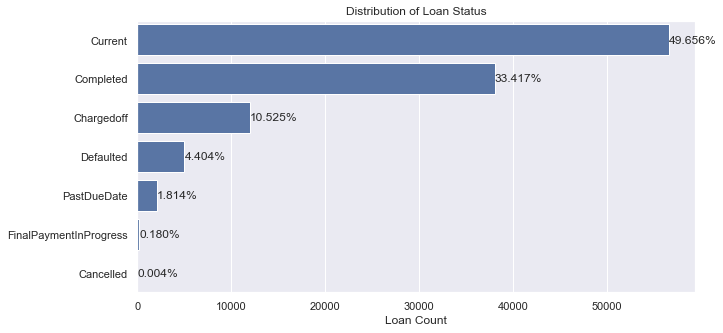

In [14]:
plt.figure(figsize=(10,5));
base_color=sb.color_palette()[0]
sb.barplot(x=loan_status_data_compressed,y=loan_status_data_compressed.index,color=base_color,order=sorted_loan_status_compressed.index);
plt.xlabel('Loan Count');
for i in range(sorted_loan_status_compressed.shape[0]):
    count=sorted_loan_status_compressed[i]
    pct_string = '{:0.3f}%'.format(100*count/n_loans)
    plt.text(count+1, i, pct_string, va='center')
plt.title('Distribution of Loan Status');

Observing how frequent each status of a loan is, we find that:
- Current loans make up about 50 % of loan status data.
- Cancelled loans represents extremelly small portion of the whole loans (0.04 %).
- All Past Due Date loans make up also a small value of 1.8 %

#### Loan Term

Second, lets investigate loans in terms of duration.

In [15]:
loan_term_counts=df['Term'].value_counts()/len(df['Term'])
loan_term_counts

36    0.770408
60    0.215426
12    0.014166
Name: Term, dtype: float64

It turns out that loans of 36 months make up the majority of loans, It is reasonable based on the difference in percentages between loan durations to visualize this difference on a donut chart.

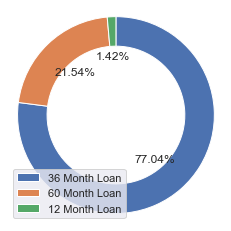

In [16]:
patches, texts,autotexts =plt.pie(loan_term_counts,startangle=90,counterclock=False,autopct='%1.2f%%',wedgeprops={'width':0.3});
labels=[r'36 Month Loan',r'60 Month Loan',r'12 Month Loan']
plt.axis('square');
plt.legend(patches,labels,loc='best');


#### Income Range

Third, the variable IncomeRange. The income range categories have an inherent ascending order, so I will create a list that contains the new ordering for visualization.

In [17]:
incomes_range=df['IncomeRange'].value_counts()
incomes_range

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [18]:
display_order=[7,5,0,1,3,2,6,4]
incomes_range_ordering =[incomes_range.index[i] for i in display_order]
incomes_range_ordering

['$0',
 '$1-24,999',
 '$25,000-49,999',
 '$50,000-74,999',
 '$75,000-99,999',
 '$100,000+',
 'Not employed',
 'Not displayed']

I want to plot a bar chart displaying the proportion of each category of income ranges. So I will get max income proportion and use it to increment probabilities from zero up to the max prop.

In [19]:
n_incomes = df['IncomeRange'].value_counts().sum()
max_incomes_count=df['IncomeRange'].value_counts()[0]
max_income_percent=max_incomes_count/n_incomes

A categorical data type of the income range variable with the new ordering need to be created before plotting.

In [20]:
income_dtype=pd.api.types.CategoricalDtype(ordered=True,categories=incomes_range_ordering)
df['IncomeRange']=df['IncomeRange'].astype(income_dtype)

Text(0, 0.5, '')

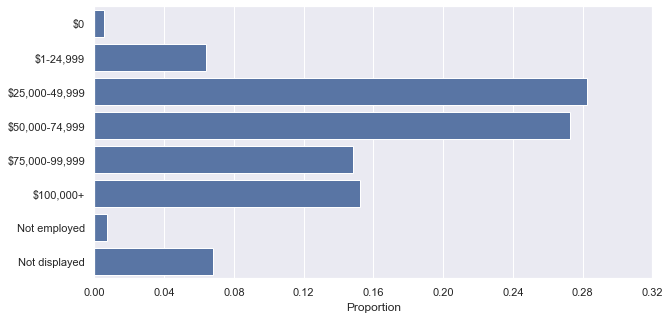

In [21]:
plt.figure(figsize=(10,5))
sb.countplot(data=df, y='IncomeRange', color=base_color);
tick_props=np.arange(0,max_income_percent+0.04,0.04)
tick_labels=['{:0.2f}'.format(p) for p in tick_props]
plt.xticks(tick_props * n_incomes, tick_labels);

plt.xlabel('Proportion');
plt.ylabel('')

Lets turn into investigating continuous variables.

#### LoanOriginalAmount

A univariate visualization would be a histogram in this case, so I am checking summary statistics of LoanOriginalAmount to help me set the scale of the axes and adjust bin sizes.

In [22]:
df['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

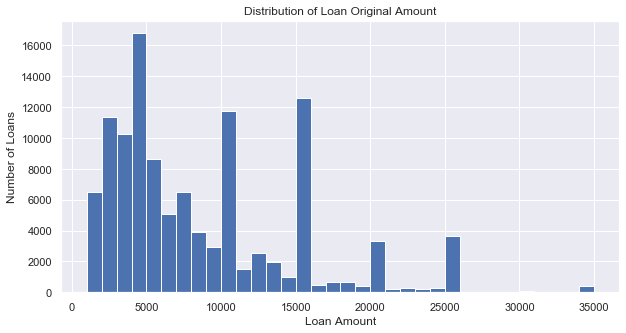

In [23]:
plt.figure(figsize=(10,5))
bins=np.arange(df['LoanOriginalAmount'].min(),df['LoanOriginalAmount'].max()+1000,1000)
plt.hist(df['LoanOriginalAmount'],bins=bins);
plt.xlabel('Loan Amount');
plt.ylabel('Number of Loans');
plt.title('Distribution of Loan Original Amount');

An interesting pattern shows here, a peak rises at every 5000 step in loan amount, this means that most loans are multiples of 5000 or just above it.

#### Monthly Loan Payment

In [24]:
df['MonthlyLoanPayment'].describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

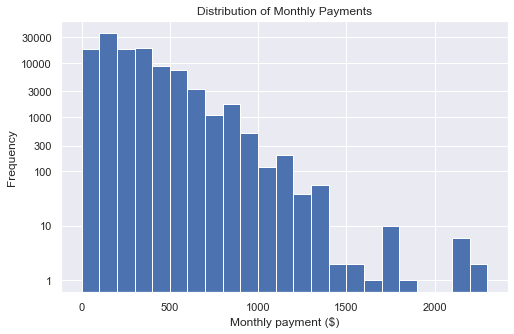

In [25]:
plt.figure(figsize=(8,5))
bins=np.arange(0,df['MonthlyLoanPayment'].max()+100,100)
plt.hist(df['MonthlyLoanPayment'],bins=bins);
plt.yscale('log');
yticks=[1,10,100,300,1000,3000,10000,30000]
ylabels=['{}'.format(v) for v in yticks]
plt.yticks(yticks,ylabels);
plt.xlabel('Monthly payment ($)');
plt.ylabel('Frequency');
plt.title('Distribution of Monthly Payments');

Plotting on a logarithmic scale , a gamma looking distribution is observed - right skewed histogram -. Larger portion of monthly payments done by borrowers is very low in value, where  payments are lower than 500 a month for the most part, and very few number of people (less than 100) are paying more than 1000 a month, and less than 10 people are paying more than 2000 a month.

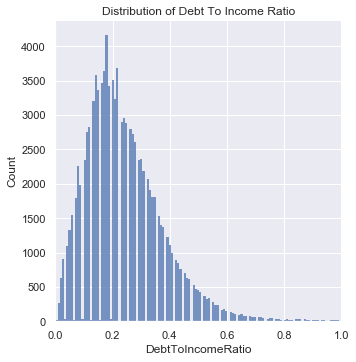

In [26]:
sb.displot(df['DebtToIncomeRatio'])
plt.xlim(0,1);
plt.title('Distribution of Debt To Income Ratio');

Last two continuous variables to investigate BorrowerRate, BorrowerAPR

In [27]:
df[['BorrowerRate','BorrowerAPR']].describe()

BorrowerRate    BorrowerAPR
count  113937.000000  113912.000000
mean        0.192764       0.218828
std         0.074818       0.080364
min         0.000000       0.006530
25%         0.134000       0.156290
50%         0.184000       0.209760
75%         0.250000       0.283810
max         0.497500       0.512290

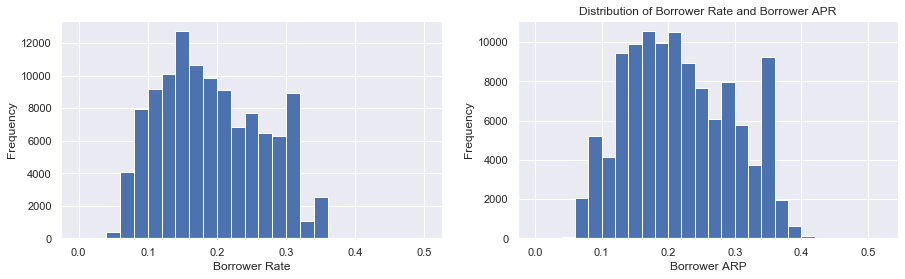

In [28]:
plt.figure(figsize=(15,4));
plt.subplot(1,2,1)
bins=np.arange(0,0.5+0.02,0.02);
plt.hist(data=df,x='BorrowerRate',bins=bins);
plt.xlabel('Borrower Rate');
plt.ylabel('Frequency');

plt.subplot(1,2,2)
bins=np.arange(0,0.52+0.02,0.02);
plt.hist(data=df,x='BorrowerAPR',bins=bins);
plt.xlabel('Borrower ARP');
plt.ylabel('Frequency');
plt.title('Distribution of Borrower Rate and Borrower APR');

Looking at both histograms, they have very similar distributions which may indicate high correlation between them.

## Bivariate Data Exploration

### What Factors affect loan status?

#### Monthly Loan Payments VS. Loan Status

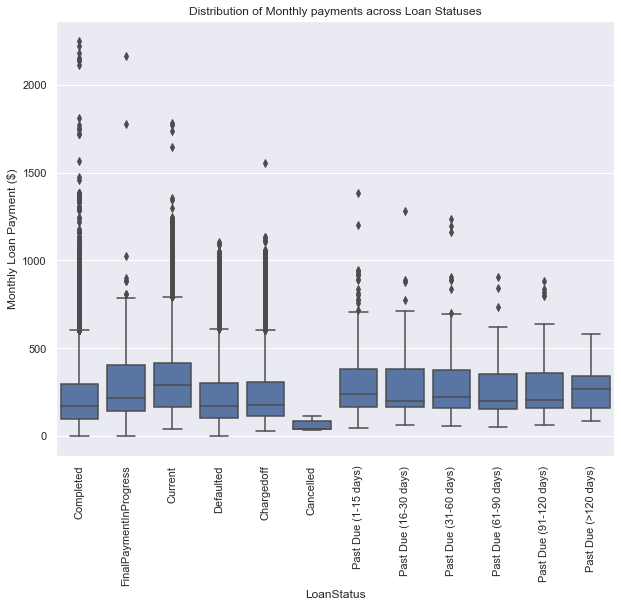

In [29]:
plt.figure(figsize=(10,8))
sb.boxplot(data=df,x='LoanStatus',y='MonthlyLoanPayment',order=['Completed', 'FinalPaymentInProgress','Current','Defaulted','Chargedoff','Cancelled','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)'],color=base_color);
plt.xticks(rotation=90);
plt.title('Distribution of Monthly payments across Loan Statuses');
plt.ylabel('Monthly Loan Payment ($)');

- As seen from boxplots, and from the distribution of monthly payments, means of monthly payments across different loan statuses are relatively close and considered low. Fewer large payments do exist as outliers across all Loan Statuses. However, we can find that Current, Final Payment, Completed loans have relatively higher means than Defaulted, Chargeoff and all Past Due loans.
- Cancelled Loans stand out as having smallest range and lowest mean, which is reasonable due to small sample size as we've known that cancelled loans make up 0.04 % of all loan data.

#### Stated Monthly Income Vs. Loan Status

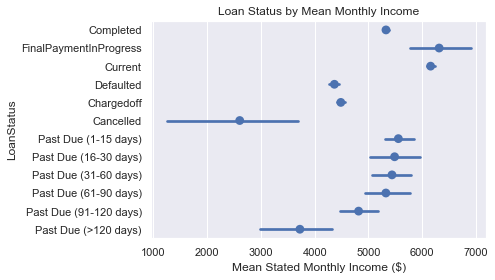

In [30]:
sb.pointplot(data=df,x='StatedMonthlyIncome',y='LoanStatus',order=['Completed', 'FinalPaymentInProgress','Current','Defaulted','Chargedoff','Cancelled','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)'],linestyles="");
plt.title('Loan Status by Mean Monthly Income');
plt.xlabel('Mean Stated Monthly Income ($)');

- A point plot shows that people with highest monthly income ,on average, are the ones who are doing their final loan payment which would be reasonable as they are more likely to be commited to paying the required amount each month. 
- Those with lowest incomes, on average,  had their loans cancelled which may be related to inability to commit to the required monthly payment. But, with that said, we need to note that the confidence interval of the mean of cancelled loans is the biggest of all confidence intervals of all loan statuses, That is because of sample size too small as seen in univariate distribution of Loan status.
- An interesting pattern to notice here that The higher the monthly income,on average, the less due days past the deadline of payment.
- Chargedoff loans have mean monthly income of about 4500. Typically, charging off is more related to not paying for more than six months, if we look at average income of those Past due date (91-120) days (3-4) months, we find it (4800) more than that of those charged off (4500) ,and mean income of those past due with more than 120 days have even lower income which also supports the previous pattern of inverse relation between due days and monthly income. But we need to consider the variation in monthly income with each category of due days as People with relatively large monthly income( matching those who completed loans or current status) might not pay for (1-3) months.

#### Loan Original Amount Vs. Loan Status

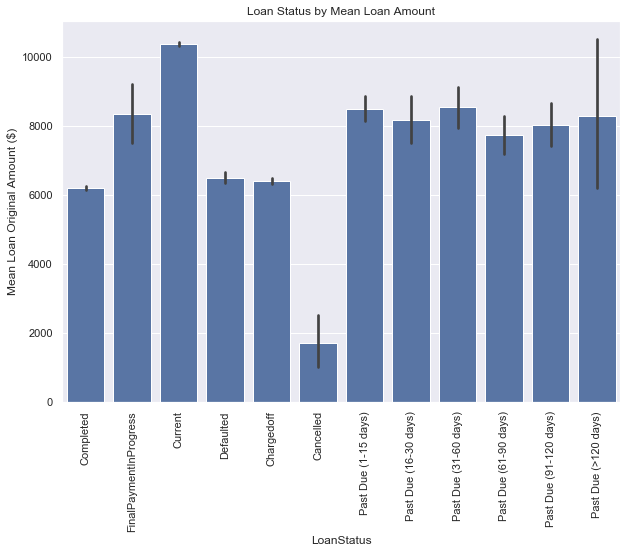

In [31]:
plt.figure(figsize=(10,7))
sb.barplot(data=df,x='LoanStatus',y='LoanOriginalAmount',order=['Completed', 'FinalPaymentInProgress','Current','Defaulted','Chargedoff','Cancelled','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)'],color=base_color);
plt.xticks(rotation=90);
plt.title('Loan Status by Mean Loan Amount');
plt.ylabel('Mean Loan Original Amount ($)');

- Looking at mean of loan original amount,  the highest mean is of those current loans, the next highest mean is of those in final payment.
- Completed loans have mean loan amount of approx 6000, interestingly, Defaulted and Chargedoff loans having similar mean to completed loans, which might be explained,from previous chart, by having lower monthly income, thus more likely to not being consistent in completing the loan.

#### IsBorrowerHomeowner Vs. Loan Status

Lets check if owning your home might affect your ability to complete a loan or get cancelled.

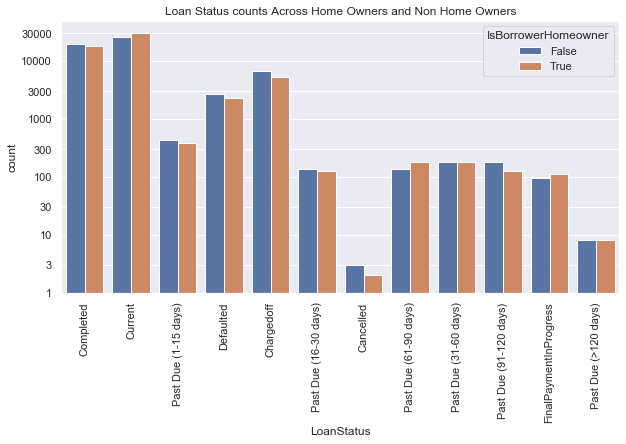

In [32]:
plt.figure(figsize=(10,5))
sb.countplot(data = df, x = 'LoanStatus', hue = 'IsBorrowerHomeowner')
plt.xticks(rotation=90);
plt.yscale('log')
yticks=[1,3,10,30,100,300,1000,3000,10000,30000]
ylabels=['{}'.format(v) for v in yticks]
plt.yticks(yticks,ylabels);
plt.title('Loan Status counts Across Home Owners and Non Home Owners');

Looking at each loan status, numbers of home owners and non home owners are very similar, so it doesn't contribute to loan status as much.

#### Borrower APR Vs. Loan Status

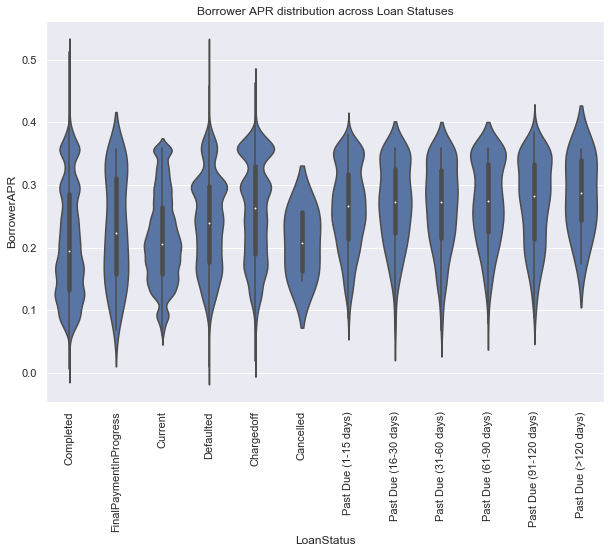

In [33]:
plt.figure(figsize=(10,7))
sb.violinplot(data=df,x='LoanStatus',y='BorrowerAPR',order=['Completed', 'FinalPaymentInProgress','Current','Defaulted','Chargedoff','Cancelled','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)'],color=base_color);
plt.xticks(rotation=90);
plt.title('Borrower APR distribution across Loan Statuses');


Here, I observe how low Borrower Rate of 0.2 or less is contributing to the bigger portion of  violoin plot of Current, Final Payment, and Completed Loans, as opposed to bigger portion and spread associated with higher rate (>0.2) for defaulted, chargedoff, cancelled and Past due date Loans.
That makes sense as Typically A loan that is considered low risk by the lender will have a lower interest rate. A loan that is considered high risk will have a higher interest rate. That is reflected in  lower risk borrowers have completed or currently paying or doing their final payment and lower risk borrowers either get past due dates, chargedoff, defaulted or cancelled.

#### What Factors affect BorrowerAPR?

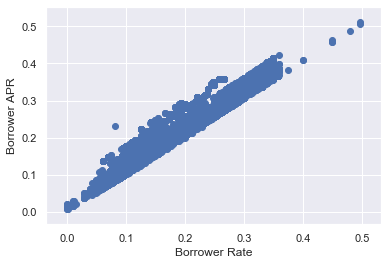

In [34]:
plt.scatter(data=df,y='BorrowerAPR',x='BorrowerRate');
plt.xlabel('Borrower Rate');
plt.ylabel('Borrower APR');

Nearly perfect linear relation exists between borrower Rate and Borrower APR.


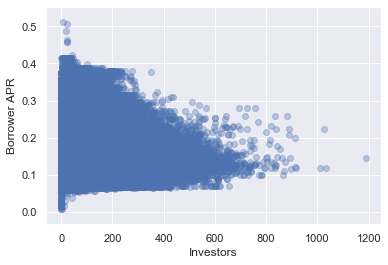

In [35]:

plt.scatter(data=df,x='Investors',y='BorrowerAPR',alpha=1/3);
plt.xlabel('Investors');
plt.ylabel('Borrower APR');

As number of investors increase, borrower APR generally tend to decrease.

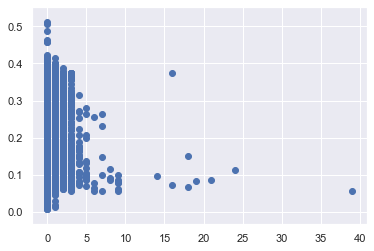

In [36]:
plt.scatter(data=df,x='Recommendations',y='BorrowerAPR');

Up to 9 recommendations, APR  seems to have wide range of values, more than 9 recommendations, borrower APR decreases to less than 0.2 except for one observation.

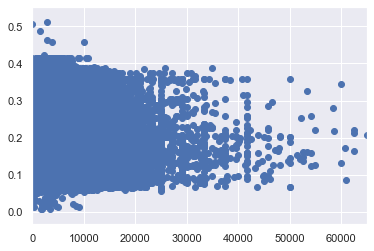

In [37]:
plt.scatter(data=df,x='StatedMonthlyIncome',y='BorrowerAPR');
plt.xlim(0,65000);

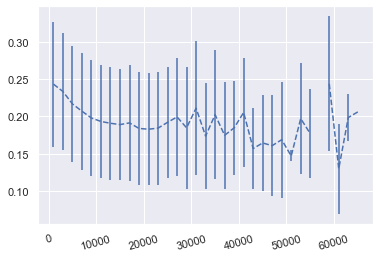

In [38]:
bin_edges=np.arange(0,65000+2000,2000)
bin_centers=bin_edges[:-1] + 1000
income_binned = pd.cut(df['StatedMonthlyIncome'], bin_edges, include_lowest = True)
mean=df['BorrowerAPR'].groupby(income_binned).mean()
std=df['BorrowerAPR'].groupby(income_binned).std()
plt.errorbar(x=bin_centers, y=mean, yerr=std,linestyle="--")

plt.xticks(rotation=15);

In [39]:
df['StatedMonthlyIncome'].describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

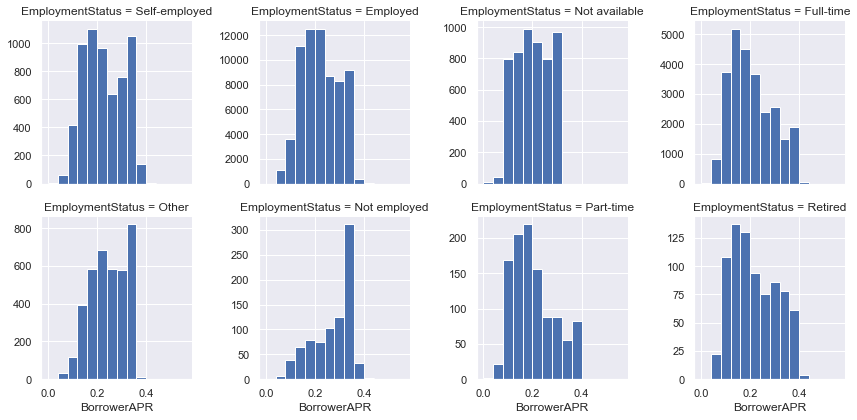

In [40]:
gr=sb.FacetGrid(data=df,col='EmploymentStatus',col_wrap=4,sharey=False)
bin_edges = np.arange(0, 0.52+0.04, 0.04)
gr.map(plt.hist,'BorrowerAPR',bins=bin_edges);


Employed, full-time, retired distributions, part-time are right skewed where BorrowerAPR tends to be of a lower value.
Not employed shows clear left skew and APR tends to be higher, other and self-employed are less ditinguishable as they contain bimodal.

# MultiVariate Exploration

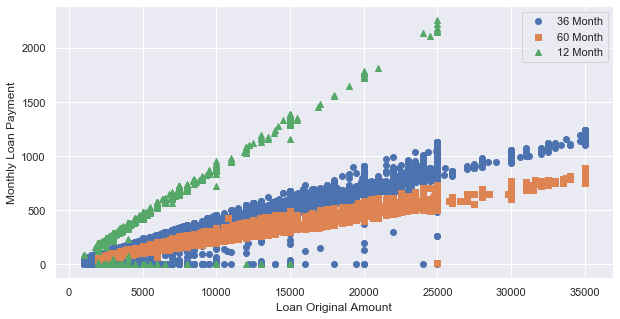

In [41]:
plt.figure(figsize=(10,5))
term_markers = [[36, 'o'],
               [60, 's'],
               [12,'^']]

for term, marker in term_markers:
    df_term = df[df['Term'] == term]
    plt.scatter(data = df_term, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', marker = marker)
plt.legend(['36 Month','60 Month','12 Month']);
plt.xlabel('Loan Original Amount');
plt.ylabel('Monthly Loan Payment');

Looking at the relation between loan amount and monthly loan payment by term, we find three lines indicating that loans with longest duration (60 month) have lowest monthly payments, whereas shortest duration loans have highest monthly payments, and payments in between those values tend to be for moderate loan durations.

In [42]:
df_long_term=df.query('Term == 60')

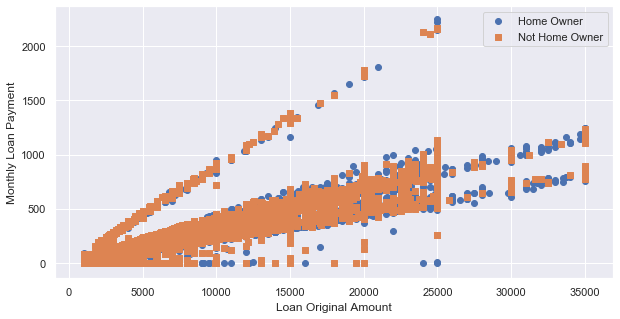

In [43]:
plt.figure(figsize=(10,5))
home_markers = [[True, 'o'],
               [False, 's']]
               

for home, marker in home_markers:
    df_term = df[df['IsBorrowerHomeowner'] == home]
    plt.scatter(data = df_term, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', marker = marker)
plt.legend(['Home Owner','Not Home Owner']);
plt.xlabel('Loan Original Amount');
plt.ylabel('Monthly Loan Payment');

Owning a home or not does not give us significant information about payments or loan amount

In [44]:
df['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

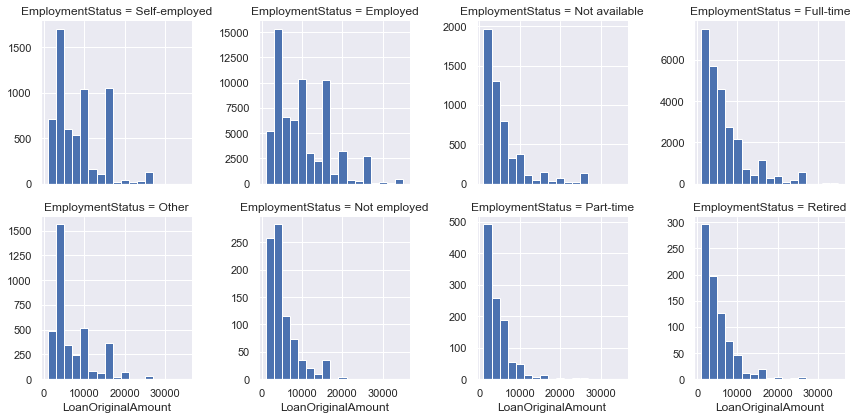

In [45]:
gr=sb.FacetGrid(data=df,col='EmploymentStatus',col_wrap=4,sharey=False)
bin_edges = np.arange(1000, 35000+2000, 2000)
gr.map(plt.hist,'LoanOriginalAmount',bins=bin_edges);